# NGBoost - Probabilistic Prediction

## Basic Usage

### Regression

In [1]:
from ngboost import NGBRegressor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X, y = load_boston(True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [3]:
ngb = NGBRegressor().fit(X_train, y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

[iter 0] loss=3.6187 val_loss=0.0000 scale=1.0000 norm=6.5258
[iter 100] loss=2.7166 val_loss=0.0000 scale=2.0000 norm=5.0525
[iter 200] loss=2.1738 val_loss=0.0000 scale=2.0000 norm=3.4278
[iter 300] loss=1.8887 val_loss=0.0000 scale=2.0000 norm=2.9074
[iter 400] loss=1.7379 val_loss=0.0000 scale=2.0000 norm=2.6676


In [4]:
# test Mean-Square Error

test_MSE = mean_squared_error(Y_preds, y_test)
print('Test MSE ', test_MSE)

Test MSE  13.372774239139703


In [5]:
test_NLL = -Y_dists.logpdf(y_test).mean()
print('Test NLL ', test_NLL)

Test NLL  4.054611680911767


In [6]:
Y_dists[0:5].params

{'loc': array([28.71246097, 33.65036606, 22.07621735, 23.08450735, 15.08876344]),
 'scale': array([1.12827192, 0.8761232 , 1.04262703, 1.26348351, 1.7660668 ])}

In [7]:
X_test[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [10]:
y_test

array([27.9, 36.1, 22.2, 24.7, 13. , 12.5, 14.5, 28.7, 22.5, 19.9, 32. ,
       21.9,  5. , 37. , 24.8, 20.2, 13.9, 18.2, 18.4, 35.2, 16.6, 23.9,
       22.9, 23. , 19.6, 18.9, 15.1, 24.4, 50. , 39.8, 23. , 17.1, 19.9,
       28.7, 19.4, 12.7, 31. , 38.7, 22.4, 50. , 31.5, 18.5, 32.2, 19.9,
       22.6, 29.9, 28.2, 25. , 27.5, 17.3, 15.2, 18.4, 22.6, 17.8, 25.1,
       18.4, 22.6, 45.4, 17.8, 19.1, 30.1, 14.5, 23.9, 19.3, 50. , 15.4,
       48.5, 13.5, 43.1, 16.8, 31.6, 19.8, 16.3, 23.2,  9.6, 22.9,  5. ,
       32.4, 18.3, 19.5, 18.8,  8.4, 48.8, 11.3, 13.1, 20.5, 13.8, 24.4,
       18.3, 17.8, 13.3, 20.4, 23.1, 32. , 31.1, 25. , 21.1,  7. , 17.2,
       27.5, 13.4, 36.2])

**Regression Distributions** 

1. Normal:
   1. Parameters: loc, scale
   2. Implemented Scores: LogScore, CRPScore
2. LogNormal:
   1. Parameters: s, scale
   2. Implemented Scores: LogScore, CRPScore
3. Exponential:
   1. Parameters: scale
   2. Implemented Scores: LogScore, CRPScore

In [12]:
from ngboost.distns import Exponential, Normal

X, y = load_boston(True)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.2)

nbg_norm = NGBRegressor(Dist=Normal, verbose=False).fit(X_reg_train, y_reg_train)

nbg_exp = NGBRegressor(Dist=Exponential, verbose=False).fit(X_reg_train, y_reg_train)

/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [15]:
nbg_norm.predict(X_reg_test)[0:5]

array([12.42644602, 33.86520126, 19.29446726, 19.57846183, 18.67452464])

In [16]:
nbg_exp.predict(X_reg_test)[0:5]

array([12.03792112, 34.55375202, 19.12192891, 19.63084873, 17.6882398 ])

In [17]:
nbg_exp.pred_dist(X_reg_test)[0:5].params

{'scale': array([12.03792112, 34.55375202, 19.12192891, 19.63084873, 17.6882398 ])}

### Survival Regression

NGBoost supports analysis of right-censored data. Any distribution that can be used for regresison in NGBoost can also be used for survival analysis theory, but this requires the implementation of the right-censored version of the appropiate score. At the moment, *LogNomal*, and *Exponential* have these scores implemented. To do survival, use the NGBSurvival and pass both the time-to-event (or censoring) and event indicator vector to fit():

In [18]:
import numpy as np
from ngboost import NGBSurvival
from ngboost.distns import LogNormal

X, Y = load_boston(True)
X_surv_train, X_surv_test, Y_surv_train, Y_surv_test = train_test_split(X, Y, test_size=0.2)

# introduce administrative censoring to simulate survival data
T_surv_train = np.minimum(Y_surv_train, 30) # time of an event or censoring
E_surv_train = Y_surv_train > 30 # 1 if T[i] is the time of an event, 0 if it's a time of censoring

ngb = NGBSurvival(Dist=LogNormal).fit(X_surv_train, T_surv_train, E_surv_train)

/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[iter 0] loss=1.2650 val_loss=0.0000 scale=4.0000 norm=2.4371
[iter 100] loss=0.5511 val_loss=0.0000 scale=2.0000 norm=0.8536
[iter 200] loss=0.3008 val_loss=0.0000 scale=2.0000 norm=0.5046
[iter 300] loss=0.1237 val_loss=0.0000 scale=2.0000 norm=0.2490
[iter 400] loss=0.0025 val_loss=0.0000 scale=2.0000 norm=0.1942


### Classification

**Classification Distributions:**

1. k-categorical(K):
   1. Parameters: $ p_{0}, p_{1}, ..., p_{K-1} $
   2. Implemented Scores: LogScore
2. Bernoulli:
   1. Parameters: $ p $
   2. Implemented Scores: LogScore

In [19]:
from ngboost import NGBClassifier
from ngboost.distns import k_categorical, Bernoulli
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(True)
y[0:15] = 2 # artificially make this a 3-class problem instead of a 2-class problem
X_cls_train, X_cls_test, Y_cls_train, Y_cls_test  = train_test_split(X, y, test_size=0.2)

ngb_cat = NGBClassifier(Dist=k_categorical(3), verbose=False) # tell ngboost that there are 3 possible outcomes
_ = ngb_cat.fit(X_cls_train, Y_cls_train) # Y should have only 3 values: {0,1,2}

/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [20]:
ngb_cat.predict(X_cls_test)[0:5]

array([1, 1, 1, 1, 1])

In [21]:
ngb_cat.predict_proba(X_cls_test)[0:5]

array([[2.55287168e-03, 9.97241984e-01, 2.05144577e-04],
       [2.55287168e-03, 9.97241984e-01, 2.05144577e-04],
       [1.75507892e-01, 6.64295672e-01, 1.60196436e-01],
       [2.55287168e-03, 9.97241984e-01, 2.05144577e-04],
       [2.55287168e-03, 9.97241984e-01, 2.05144577e-04]])

In [23]:
ngb_cat.pred_dist(X_cls_test)[0:5].params

{'p0': array([0.00255287, 0.00255287, 0.17550789, 0.00255287, 0.00255287]),
 'p1': array([0.99724198, 0.99724198, 0.66429567, 0.99724198, 0.99724198]),
 'p2': array([0.00020514, 0.00020514, 0.16019644, 0.00020514, 0.00020514])}

### Base Learners

NGBoost can be used with any sklearn regressor as the base learner, specified with the *Base* argument. The default is a depth-3 regression tree.

In [25]:
from sklearn.tree import DecisionTreeRegressor
from ngboost.scores import LogScore, CRPScore

learner = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

NGBSurvival(Dist=Exponential, Score=CRPScore, Base=learner, verbose=False).fit(X_surv_train, T_surv_train, E_surv_train)

NGBSurvival(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=5),
            Dist=<class 'ngboost.distns.utils.SurvivalDistnClass.<locals>.SurvivalDistn'>,
            Score=<class 'ngboost.scores.CRPScore'>,
            random_state=RandomState(MT19937) at 0x7FF223F74940, verbose=False)

### Other Arguments

The learning rate, number of estimators, minibatch fraction and column subsampling are also easily adjusted:

In [27]:
ngb = NGBRegressor(n_estimators=100, learning_rate=0.01,
             minibatch_frac=0.5, col_sample=0.5)
ngb.fit(X_reg_train, y_reg_train)

[iter 0] loss=3.6256 val_loss=0.0000 scale=1.0000 norm=6.6644


NGBRegressor(col_sample=0.5, minibatch_frac=0.5, n_estimators=100,
             random_state=RandomState(MT19937) at 0x7FF223F74940)

Sample weights (for training) are set using the sample_weight argument to fit:

In [28]:
ngb = NGBRegressor(n_estimators=100, learning_rate=0.01,
             minibatch_frac=0.5, col_sample=0.5)
weights = np.random.random(y_reg_train.shape)
ngb.fit(X_reg_train, y_reg_train, sample_weight=weights)

[iter 0] loss=3.5734 val_loss=0.0000 scale=2.0000 norm=12.7112


NGBRegressor(col_sample=0.5, minibatch_frac=0.5, n_estimators=100,
             random_state=RandomState(MT19937) at 0x7FF223F74940)

## Model Interpretation

NGBoost does provide methods to interpret models fit with regression tree base learners. Since each parameter in the distribution is fit by a separate sequence of learners, there will be multiple model interpretation, one for each parameter. The default distribution is *Normal* so the following example shows results for the loc and scale parameters:

In [29]:
ngb = NGBRegressor(verbose=False).fit(X_reg_train, y_reg_train)

## Feature importance for loc trees
feature_importance_loc = ngb.feature_importances_[0]

## Feature importance for scale trees
feature_importance_scale = ngb.feature_importances_[1]

In [30]:
feature_importance_loc

array([0.060036  , 0.00718205, 0.02316092, 0.01085175, 0.0771423 ,
       0.22487457, 0.06766965, 0.13643156, 0.01657843, 0.06172467,
       0.06669559, 0.07236142, 0.17529109])

In [31]:
feature_importance_scale

array([1.13612044e-01, 3.10057957e-03, 2.65731160e-02, 4.55640824e-05,
       1.23367840e-01, 1.24198118e-01, 6.89913324e-02, 1.15175348e-01,
       3.09072326e-02, 7.43227939e-02, 2.28635883e-02, 1.09338162e-01,
       1.87504282e-01])

Text(0.5, 1.0, 'scale param')

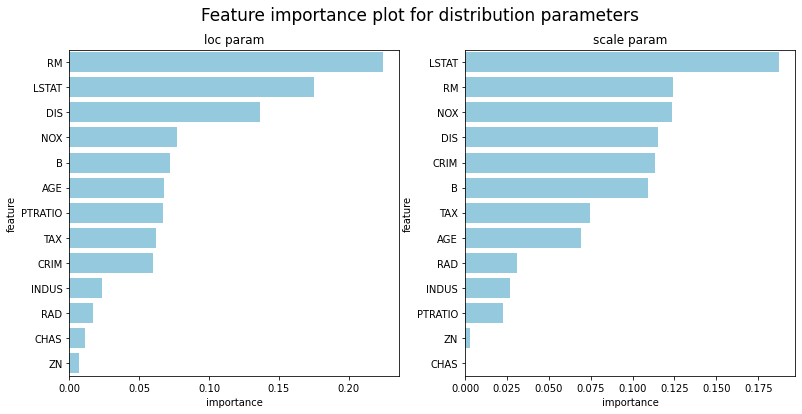

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_loc = pd.DataFrame({'feature':load_boston()['feature_names'],
                       'importance':feature_importance_loc})\
    .sort_values('importance',ascending=False)
df_scale = pd.DataFrame({'feature':load_boston()['feature_names'],
                       'importance':feature_importance_scale})\
    .sort_values('importance',ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle("Feature importance plot for distribution parameters", fontsize=17)
sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc, color="skyblue").set_title('loc param')
sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale, color="skyblue").set_title('scale param')

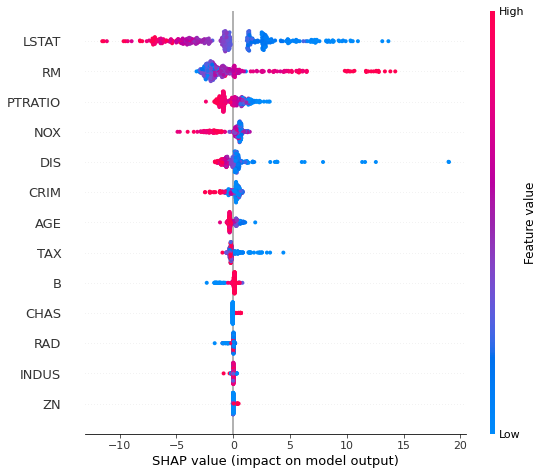

In [33]:
import shap
shap.initjs()

## SHAP plot for loc trees
explainer = shap.TreeExplainer(ngb, model_output=0) # use model_output = 1 for scale trees
shap_values = explainer.shap_values(X_reg_train)
shap.summary_plot(shap_values, X_reg_train, feature_names=load_boston()['feature_names'])

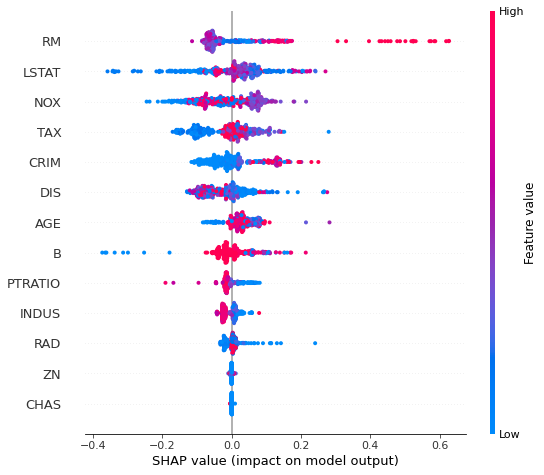

In [34]:
explainer = shap.TreeExplainer(ngb, model_output=1) # use model_output = 1 for scale trees
shap_values = explainer.shap_values(X_reg_train)
shap.summary_plot(shap_values, X_reg_train, feature_names=load_boston()['feature_names'])

## Developing your own distribution model

if you want to experiment with distributions or scores that are not yet supported, here is the process of implementing a new distribution score

### Adding Distributions

First you need to write a class for your new distribution. The class must subclass the appropiate distribution type (regression or classification) and must implement methods for *.fit()* and *.sample()*. The scores compatible with the distribution should be stored in a class attribute called *score* and the number of parameters in a class attribute *n_params*. The class must also store the (internal) distributional parameters in a *_params* instance attribute. Additionally, regression distributions must implement a mean() method to support point prediction. 

In this example, I will use a Laplace distribution as an example, with user facing parameters $\mu \in R $ and b>0, which we will call loc and scale, to conform with scipy implementation.

In NGBoost, all parameters must be represented internally in  R , so we need to reparametrize  (μ,b)  to, for instance,  (μ,log(b)) . The latter are the parameters we need to work with when we initialize a Laplace object and when implement the score.

In [38]:
from scipy.stats import laplace as dist
import numpy as np
from ngboost.distns.distn import RegressionDistn
from ngboost.scores import LogScore

class LaplaceLogScore(LogScore):

    def score(self, Y):
        return -self.dist.logpdf(Y)

    def d_score(self, Y):
        D = np.zeros((len(Y), 2)) # first col is dS/d𝜇, second col is dS/d(log(b))
        D[:, 0] = np.sign(self.loc - Y)/self.scale
        D[:, 1] = 1 - np.abs(self.loc - Y)/self.scale
        return D

class Laplace(RegressionDistn):

    n_params = 2
    scores = [LaplaceLogScore]

    def __init__(self, params):
        # save the parameters
        self._params = params

        # create other objects that will be useful later
        self.loc = params[0]
        self.logscale = params[1]
        self.scale = np.exp(params[1]) # since params[1] is log(scale)
        self.dist = dist(loc=self.loc, scale=self.scale)

    def fit(Y):
        m, s = dist.fit(Y) # use scipy's implementation
        return np.array([m, np.log(s)])

    def sample(self, m):
        return np.array([self.dist.rvs() for i in range(m)])

    def __getattr__(self, name): # gives us access to Laplace.mean() required for RegressionDist.predict()
        if name in dir(self.dist):
            return getattr(self.dist, name)
        return None

    @property
    def params(self):
        return {'loc':self.loc, 'scale':self.scale}

The derivatives with respect to  logb  and  μ  are easily derived using, for instance, WolframAlpha.

In this example we won't bother implementing metric(), which would return the current Fisher Information. The reason is that the NGBoost implmentation of LogScore has a default metric() method that uses a Monte Carlo method to approximate the Fisher Information using the gradient() method and the distribution's sample() method (that's why we needed to implement sample()). By inhereting from LogScore(), not only can NGBoost find our implementation for the Laplace distribution, it can also fall back on the defualt metric() method. More on that later.

In [39]:
from ngboost import NGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, Y = load_boston(True)
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor(Dist=Laplace, Score=LogScore).fit(X_reg_train, Y_reg_train)
Y_preds = ngb.predict(X_reg_test)
Y_dists = ngb.pred_dist(X_reg_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_reg_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_reg_test).mean()
print('Test NLL', test_NLL)

Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


[iter 0] loss=3.5830 val_loss=0.0000 scale=1.0000 norm=6.8033
[iter 100] loss=2.8192 val_loss=0.0000 scale=1.0000 norm=5.3307
[iter 200] loss=2.4173 val_loss=0.0000 scale=1.0000 norm=3.5214
[iter 300] loss=2.1942 val_loss=0.0000 scale=1.0000 norm=2.4711
[iter 400] loss=2.0779 val_loss=0.0000 scale=1.0000 norm=1.9699
Test MSE 13.951940456215052
Test NLL 2.8150206378379807


### Censored Scores

You can make your distribution suitable for use in surival analysis if you implement a censored version of the score. The signature for the *score(), d_score() and metric()* methods should be the same, but they should expect Y to be indexable into two arrays like *E, T = Y["Event"], Y["Time"]*. Furthermore, any censored scores should be linked to the distribution class definition via a class attribute called censored_scores instead of scores.

Since censored scores are more general than their standard counterparts (fully observed data is a specific case of censored data), if you implement a censored score in NGBoost, it will automatically become available as a useable score for standard regression analysis. No need to implement the regression score seperately or register it in the *scores* class attribute.

### Metrics

Using the logscore, the easiest thing to do as a developer is to lean on the default ngboost method that calculates the log score metric. 

However, the distribution-agnostic default method is slow because it must sample from the distribution many times to build up an approximation of the metric. If you want to make it faster, then you must derive and implement the distribution-specific Riemannian metric, which for the log score is the Fisher information matrix of that distribution. You have to derive the Fisher with respect to the internal ngboost parameterization (if that is different to the user-facing parametrization, e.g.  log(σ) , not  σ ). Deriving a Fisher is not necessarily easy since you have to compute an expectation analytically, but there are many examples online of deriving Fisher matrices that you can look through.

For example, consider the Student T distribution. This distribution is parametrised by degrees of freedom $\nu$, mean $\mu$ and the standard deviation $\sigma$. 

The fisher information of this distribution is:

$$
\left(\begin{array}{cc} 
\nu+1 \over (\nu+3)\sigma^{2} & 0\\
0 & \nu \over 2(\nu+3)\sigma^{4}
\end{array}\right)
$$ 

Also as $\sigma$ is > 0, then we must replace with $log(\sigma)$ for NGBoost. This requires to reparametrized the distribution and fisher information.

$$ \eta = (\mu, \sigma), \theta = (\mu, log\sigma) $$

$$ I_{\eta}(\eta) = J^{T}I_{\theta}(\theta)J $$

Where J is a 2x2 jacobian matrix defined by:

$$ \left\lvert J \right\rvert_{i,j} = \frac{\partial \theta_{i}}{\partial \eta_{j}} $$ 

Which evaluates to:

$$ J = J^{T} = \left(\begin{array}{cc} 
1 & 0\\
0 & 1 \over \sigma
\end{array}\right) $$

$$ J^{-1} = \left(\begin{array}{cc} 
1 & 0\\
0 & \sigma
\end{array}\right) $$

$$ I_{\theta}(\theta) = J^{-1}I_{\eta}(\eta)J^{-1} = \left(\begin{array}{cc} 1 & 0\\ 0 & 1 \over \sigma \end{array}\right) \left(\begin{array}{cc} \nu+1 \over (\nu+3)\sigma^{2} & 0\\ 0 & \nu \over 2(\nu+3)\sigma^{4} \end{array}\right) \left(\begin{array}{cc} 1 & 0\\
0 & \sigma \end{array}\right) = \left(\begin{array}{cc} \nu+1 \over (\nu+3)\sigma^{2} & 0\\ 0 & \nu \over 2(\nu+3)\sigma^{2} \end{array}\right) $$

If you don't want to use the log score (say you want CRP score, for example), then ngboost does not (yet?) have a default method for calculating the metric and you must derive and implement it yourself. This is harder than deriving a Fisher because there are not many worked examples. The most general derivation process should follow the outline [here](https://agustinus.kristia.de/techblog/2018/03/14/natural-gradient/), replacing the KL divergence (which is induced by the log score) with whichever divergence is induced by the scoring rule you want to use (e.g. L2 for CRPS), again taking care to derive with respect to the internal ngboost parameterization, not the user-facing one. For any particular score, there may be a specific closed-form expression that you can use to calculate the metric across distributions (the expression for the Fisher Info serves this purpose for the log score) or there may not be- I actually don't know the answer to this question! But if there were, that could suggest some kind of default implementation for that score's metric() method.

### Adding Scores 

We've seen how to implement an existing score for a new distribution, but making a new score altogether in NGBoost is also easy: just make a new class that subclasses Score:

In [40]:
from ngboost.scores import Score

class SphericalScore(Score):
    pass